<a href="https://colab.research.google.com/github/Priesemann-Group/covid19_research/blob/master/data_exploration/germany_rki_bundeslaender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%html
<style>
    .jp-OutputArea-child {
        display: inline-block;
    }
</style>

In [4]:
#Imports module and loads data
import sys
import matplotlib
import matplotlib.pyplot as plt
import datetime
import pandas as pd

#If module is not found, downloads it to root folder (ignored by git)
try: 
    import covid19_inference as cov19
except ModuleNotFoundError:
    
    sys.path.append('../covid19_inference-master')
    try:
        import covid19_inference as cov19
        
    except ModuleNotFoundError:
        url_repo = "https://github.com/Priesemann-Group/covid19_inference/archive/master.zip"

        import requests, zipfile, io
        r = requests.get(url_repo)
        z = zipfile.ZipFile(io.BytesIO(r.content))
        z.extractall(path="..")
        import covid19_inference as cov19
        
#Loads data        
rki = cov19.data_retrieval.RKI(True)

#Lists weekend days
begin = rki.data.date.min()
end = rki.data.date.max()
date_range = pd.date_range(begin, end)
sundays = date_range[date_range.weekday == 6]
saturdays = date_range[date_range.weekday == 5]

INFO     [covid19_inference.data_retrieval.retrieval] Successfully downloaded new files.
INFO     [covid19_inference.data_retrieval.retrieval] Local backup to /tmp/covid19_data/Rki.csv.gz successful.


## Plots new cases (Refdatum, Meldedatum) per German state (Bundeslander)

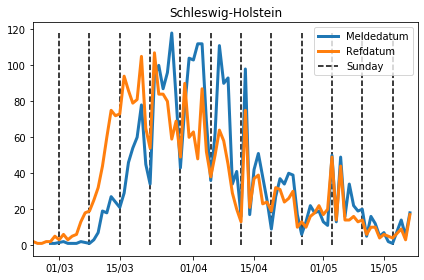

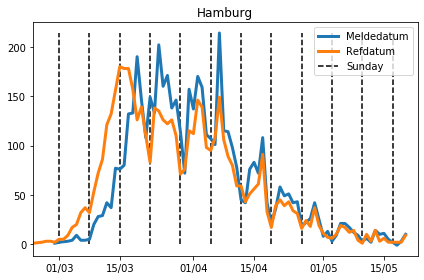

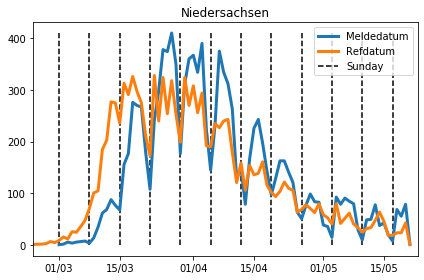

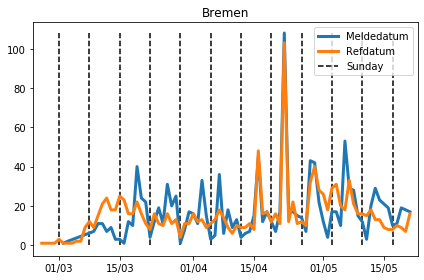

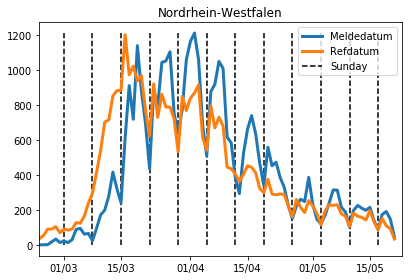

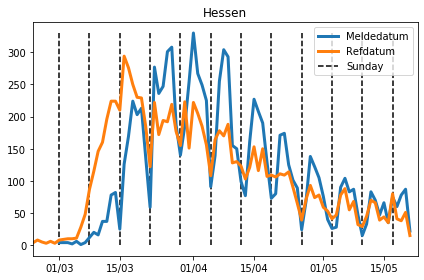

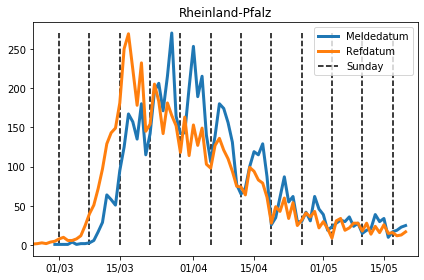

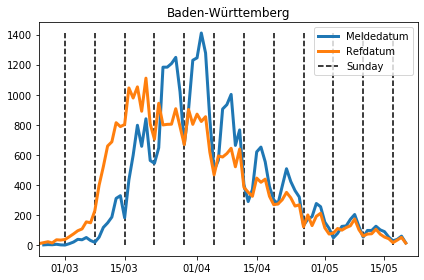

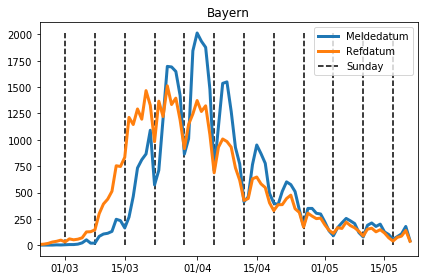

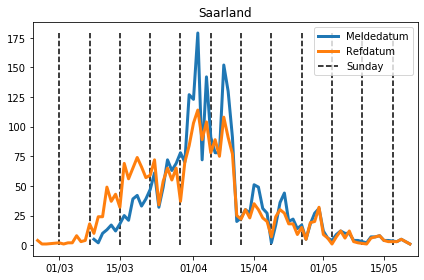

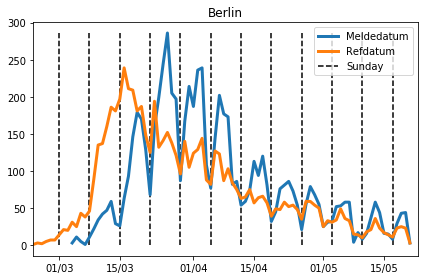

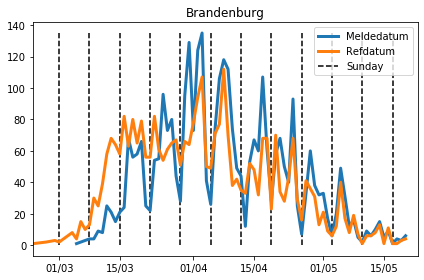

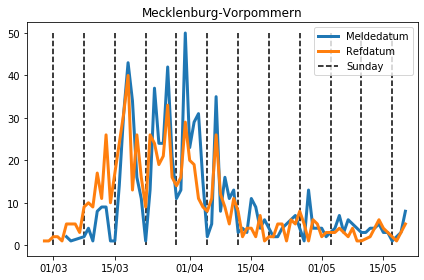

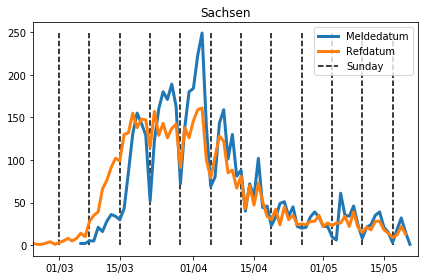

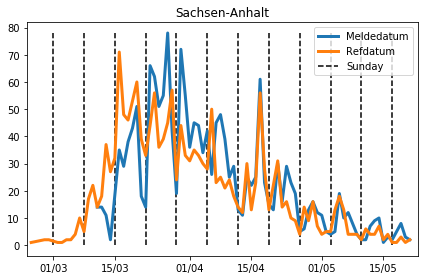

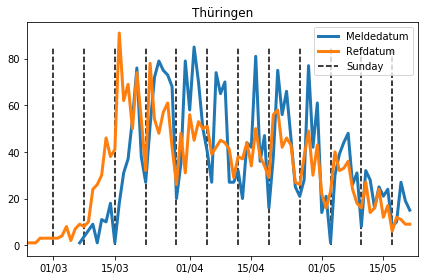

In [5]:
#Plots Bundesland (Meldedatum)
x_range = [datetime.datetime(2020,2,24), datetime.datetime.today()]

bundesland_list = rki.data.Bundesland.unique()
for str_bundesland in bundesland_list:
    data = rki.get_total(bundesland=str_bundesland)
    data_new = data.diff().drop(data.index[0]).astype(int).reset_index()
    
    data_ref = rki.get_total(bundesland=str_bundesland, date_type='date_ref')
    data_ref_new = data_ref.diff().drop(data_ref.index[0]).astype(int).reset_index()
    
    plt.figure(figsize=(6,4))
    plt.vlines(sundays, ymin=0, ymax=data_new.confirmed.max(), linestyles='dashed', label='Sunday')
    plt.plot(data_new.date, data_new.confirmed, label='Meldedatum', lw=3)
    plt.plot(data_ref_new.date_ref, data_ref_new.confirmed, label='Refdatum', lw=3)
    plt.title(str_bundesland)
    plt.tight_layout()
    #plt.gca().tick_params(labelbottom=False)
    plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%d/%m'))
    plt.xlim(x_range)
    plt.legend()